## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  徐子诚
+ 学号  0165215

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
df = pd.read_csv('CEPS.csv',encoding='gb2312')
df.head()

D:\Qiyi\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (20,22,23,25,28,29,39,49,74,124,125,126,127,128,129,130,131,138,140,141,147,160,161,162,165,170,174,175,176,177,179,180,181,182,183,184,188,191,194,195,196,199,221,222,223,224,251,252,254,289,290,294,295,296) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ids,clsids,schids,ctyids,frame,subsample,sweight,fall,grade9,stcog,...,steco_3c,stonly,stsib,stsibrank,stmedu,stfedu,stprhedu,stfdrunk,stprfight,stprrel
0,1,1,1,1,3,3,218.738892,0,0,11,...,3,1,,,3,3,3,1,1,2
1,2,1,1,1,3,3,216.518234,0,0,17,...,2,1,,,8,5,8,1,1,2
2,3,1,1,1,3,3,216.518234,0,0,12,...,2,2,1,3,3,3,3,1,1,1
3,4,1,1,1,3,3,218.738892,0,0,10,...,2,1,,,6,7,7,1,1,2
4,5,1,1,1,3,3,217.553040,0,0,10,...,3,1,,,7,8,8,1,1,2


In [2]:
#选择的两个变量分别为写作业时间和上网时间（即b16a1/a2,b16f1/f2），尽管时间只到分钟，但可以近似看成连续变量
#由于选择的变量储存方式选择了小时和分钟分开储存，首先需把时间都化为分钟
#由于缺失值都是空格形式，所以先要把空格化为缺失值
test_frame=df.iloc[0:,[94,95,104,105,110,111]]
test_frame.b16a1=test_frame.b16a1.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16a2=test_frame.b16a2.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16f1=test_frame.b16f1.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16f2=test_frame.b16f2.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b18a=test_frame.b18a.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b18b=test_frame.b18b.apply(lambda x: np.NaN if str(x).isspace() else x)

test_frame=test_frame.dropna(axis = 0,how='any')#把有缺失值的行整行去除

#下面开始把小时和分钟合并
test_frame.b16a1=test_frame.b16a1.astype('float')
test_frame.b16a2=test_frame.b16a2.astype('float')
test_frame.b16f1=test_frame.b16f1.astype('float')
test_frame.b16f2=test_frame.b16f2.astype('float')
test_frame.b18a=test_frame.b18a.astype('float')
test_frame.b18b=test_frame.b18b.astype('float')

hw_time=test_frame.b16a1*60+test_frame.b16a2
internet_time=test_frame.b16f1*60+test_frame.b16f2
sleep_time=test_frame.b18a*60+test_frame.b18b

experiment_frame=pd.DataFrame({'hw_time':hw_time,'internet_time':internet_time,'sleep_time':sleep_time})
experiment_frame#这样就完成了合并，并处理掉了缺失值

,hw_time,internet_time,sleep_time
0,30.0,30.0,540.0
1,60.0,60.0,540.0
2,75.0,120.0,480.0
3,60.0,40.0,540.0
4,0.0,450.0,450.0
5,0.0,0.0,450.0
6,0.0,120.0,420.0
7,240.0,0.0,450.0
8,180.0,60.0,480.0
9,60.0,90.0,420.0


In [3]:
#下面开始随机取样本，算均值
sample=experiment_frame.sample(1000)
mean_homework=np.mean(sample.hw_time)
mean_internet=np.mean(sample.internet_time)
print("写作业时间的均值为%s分钟"%mean_homework)
print("上网时间的均值为%s分钟"%mean_internet)

写作业时间的均值为63.151分钟
上网时间的均值为90.788分钟


[59.056, 57.993, 61.058, 63.33, 59.097, 59.663, 59.871, 66.157, 61.938, 61.746, 60.365, 62.26, 57.62, 59.797, 55.18, 64.365, 62.078, 60.155, 59.887, 62.639, 57.872, 66.022, 60.387, 58.357, 60.499, 62.717, 61.872, 60.319, 60.812, 63.777]
[86.359, 96.453, 85.638, 87.194, 88.446, 88.182, 88.167, 92.277, 83.248, 89.688, 92.264, 87.985, 89.792, 86.928, 90.283, 95.466, 84.799, 88.863, 88.746, 91.306, 86.872, 90.461, 94.942, 85.969, 88.397, 92.677, 84.134, 79.263, 86.005, 80.778]


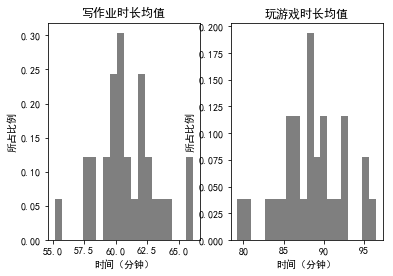

In [4]:
#下面开始重复计算30次
num = 0
mean_hw=[]
mean_net=[]
while num<30:
    sample_frame=experiment_frame.sample(n=1000)
    mean_homework=np.mean(sample_frame.hw_time)
    mean_hw.append(mean_homework)
    mean_internet=np.mean(sample_frame.internet_time)
    mean_net.append(mean_internet)
    num=num+1
print(mean_hw)
print(mean_net)#获得了30个写作业时间均值和上网时间均值

#以下开始绘图
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.set_title("写作业时长均值",fontdict=None,loc='center')
ax1.set_xlabel('时间（分钟）')
ax1.set_ylabel('所占比例')
ax1.hist(mean_hw,20,normed=1,facecolor='black',alpha=0.5)

ax2.set_title("玩游戏时长均值",fontdict=None,loc='center')
ax2.set_xlabel('时间（分钟）')
ax2.set_ylabel('所占比例')
ax2.hist(mean_net,20,normed=1,facecolor='black',alpha=0.5)

plt.show()

In [5]:
#接下来求均值的均值和标准差
mean_hws=np.mean(mean_hw)
mean_nets=np.mean(mean_net)
stmean_hw=np.var(mean_hw)**0.5
stmean_net=np.var(mean_net)**0.5
print('平均写作业时长的均值为%s'%mean_hws)
print('平均写作业时长标准误为%s\n'%stmean_hw)
print('平均玩游戏时长为%s'%mean_nets)
print('平均玩游戏时长标准误为%s\n'%stmean_net)

平均写作业时长的均值为60.8963
平均写作业时长标准误为2.40167384894

平均玩游戏时长为88.3860666667
平均玩游戏时长标准误为3.89424956342



### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

学生在青少年时期的睡眠时长是重要的，但是现如今有许多诱惑使他们的睡眠不足。
本次研究选用家里是否有电脑和网络、玩游戏时长、看电视时长作为自变量，睡眠时长作为因变量，
来检验这些因素对学生睡眠时长的影响，代码即结果如下

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
test_frame=df.iloc[0:,[75,102,103,104,105,110,111]]
test_frame.b13=test_frame.b13.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16e1=test_frame.b16e1.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16e2=test_frame.b16e2.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16f1=test_frame.b16f1.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b16f2=test_frame.b16f2.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b18a=test_frame.b18a.apply(lambda x: np.NaN if str(x).isspace() else x)
test_frame.b18b=test_frame.b18b.apply(lambda x: np.NaN if str(x).isspace() else x)

test_frame=test_frame.dropna(axis = 0,how='any')

test_frame.b13=test_frame.b13.astype('float')
test_frame.b16f1=test_frame.b16f1.astype('float')
test_frame.b16f2=test_frame.b16f2.astype('float')
test_frame.b16e1=test_frame.b16e1.astype('float')
test_frame.b16e2=test_frame.b16e2.astype('float')
test_frame.b18a=test_frame.b18a.astype('float')
test_frame.b18b=test_frame.b18b.astype('float')

situation=test_frame.b13
tv_time=test_frame.b16e1*60+test_frame.b16e2
internet_time=test_frame.b16f1*60+test_frame.b16f2
sleep_time=test_frame.b18a*60+test_frame.b18b

indep_var=pd.DataFrame({'situation':situation,'tv_time':tv_time,'internet_time':internet_time})
dep_var=pd.DataFrame({'sleep_time':sleep_time})
model = sm.OLS(dep_var,indep_var) #使用最小二乘法进行拟合
results = model.fit()



In [7]:
results.params#系数检验结果

internet_time      0.040322
situation        192.189215
tv_time            1.026775
dtype: float64

In [8]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             sleep_time   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                 1.613e+04
Date:                Mon, 31 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:51:16   Log-Likelihood:            -1.2560e+05
No. Observations:               18051   AIC:                         2.512e+05
Df Residuals:                   18048   BIC:                         2.512e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
internet_time     0.0403      0.015      2.724

模型显著性判断：
根据F统计量的检验结果，P值明显小于0.05，所以可以判断模型显著

各系数的显著性检验结果：
从图中可以看出，三个系数的均通过了检验，t值在0.05的显著性水平都明显小于0.05

模型结果解释：
根据变量系数的结果可以看出家里是否有电脑和网络对睡眠时长的影响是巨大的，根据结果可以得出，
无电脑无网络为数字0，有电脑或网络为数字1，两者皆有为数字2的设定下，每数字的单位改变改都会
使睡眠时长增加或减少192分钟。
看电视时长比玩电脑时长对七年级学生睡眠时长的影响要大，根据结果，每一单位看电视时长的改变将
会影响睡眠时长1.026775分钟，而玩电脑时长每一单位改变仅会影响睡眠时长0.040322分钟

R方的值为 0.728说明该模型可以解释睡眠的方差比例是比较大的，说明模型拟合结果较好